Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Зародова Елена Николаевна

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
pip install requests

0	Ясное небо.
1, 2, 3	Преимущественно ясно, переменная облачность, пасмурно
45, 48	Туман и оседающий изморозь
51, 53, 55	Морось: слабая, умеренная и интенсивная
56, 57	Замерзающая морось: слабая и плотная интенсивность
61, 63, 65	Дождь: слабый, умеренный и сильный
66, 67	Замерзающий дождь: слабой и сильной интенсивности
71, 73, 75	Снегопад: слабый, умеренный и сильный.
77	Снежные зерна
80, 81, 82	Ливневые дожди: слабые, умеренные и сильные
85, 86	Снежные ливни слабые и сильные
95 *	Гроза: слабая или умеренная
96, 99 *	Гроза с небольшим и сильным градом

In [ ]:
import requests
from datetime import datetime



def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False



def clear_data(data):

    current_date = datetime.today().date()
    day = current_date.day
    month = current_date.month
    current_date = f'{day}.{month}'


    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']


    weather_code = data['current']['weather_code']
    bad_weather = [51, 53, 55, 61, 63, 65, 71, 73, 75, 80, 81, 82 ]
    if weather_code in [0, 1]:
        message = 'нет осадков, ясно'
    elif weather_code == 45:
        message = 'нет осадков, туман'
    elif weather_code in bad_weather:
        message = 'осадки, без тумана'
    else:
        message = 'посмотри в окно'

    message = f'Сегодня ({current_date}) погода {temperature} {temperature_format}, {message}'

    return message



def main():
    coordinates = input('Введите ваши координаты:\n').split(', ')
    url = f'https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}&longitude={coordinates[1]}&current=temperature_2m,weather_code'
    data = send_request(url)
    print(clear_data(data))


if __name__ == '__main__':
    main()

Введите ваши координаты:
56.50, 60.35
Сегодня (1.11) погода 1.2 °C, посмотри в окно


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests


def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


def list_names(pokemons):
    pokemon_names = []
    for pokemon in pokemons['results']:
        pokemons_names.append(pokemon['name'])
        return pokemon_names


def characteristics_pokemons(name):
    url = f'https://pokeapi.co/api/v2/pokemon/{name.lower()}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()

        name = data['name']
        types = []
        for t in data['types']:
            type_name = t['type']['name']
            types.append(type_name)
        weight = data['weight']
        height = data['height']
        abilities = []
        for a in data['abilities']:
            ability_name = a['ability']['name']
            abilities.append(ability_name)
        return {
                  'Имя': name,
                  'Тип': types,
                  'Вес': weight,
                  'Рост': height,
                  'Способности': abilities
              }
    else:
      print ('покемон не найден')
      return None


url = 'https://pokeapi.co/api/v2/pokemon?limit=20'
pokemons = send_request(url)


def main():
    names = list_names(pokemons)
    print('cписок первых 20 покемонов: ')
    print(names)
    user_input = input('введите имя покемона: ')
    pokemon_info = characteristics_pokemons(user_input)
    if pokemon_info:
      print ('характеристики покемона: ')
      for key, value in pokemon_info.items():
            print (f"{key}: {value}")


if __name__ == '__main__':
    main()

cписок первых 20 покемонов: 
['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate']
введите имя покемона: ivysaur
характеристики покемона: 
Имя: ivysaur
Тип: ['grass', 'poison']
Вес: 130
Рост: 10
Способности: ['overgrow', 'chlorophyll']


In [ ]:
{'count': 1302,
 'next': 'https://pokeapi.co/api/v2/pokemon/?offset=20&limit=20',
 'previous': None,
 'results': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
  {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
  {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
  {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
  {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
  {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
  {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
  {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
  {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
  {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
  {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
  {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
  {'name': 'weedle', 'url': 'https://pokeapi.co/api/v2/pokemon/13/'},
  {'name': 'kakuna', 'url': 'https://pokeapi.co/api/v2/pokemon/14/'},
  {'name': 'beedrill', 'url': 'https://pokeapi.co/api/v2/pokemon/15/'},
  {'name': 'pidgey', 'url': 'https://pokeapi.co/api/v2/pokemon/16/'},
  {'name': 'pidgeotto', 'url': 'https://pokeapi.co/api/v2/pokemon/17/'},
  {'name': 'pidgeot', 'url': 'https://pokeapi.co/api/v2/pokemon/18/'},
  {'name': 'rattata', 'url': 'https://pokeapi.co/api/v2/pokemon/19/'},
  {'name': 'raticate', 'url': 'https://pokeapi.co/api/v2/pokemon/20/'}]}

Задание 3. HTTP-запросы, ответы и посты






Описание:

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль


In [ ]:
import requests


def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


def post_by_id(post_id):
    url_by_id = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    response = requests.get(url_by_id)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


def post_info(post_data):
    if post_data:
        print('информация о посте:')
        print('ID:', post_data['id'])
        print('заголовок:', post_data['title'])
        print('текст:', post_data['body'])
        print('ID пользователя:', post_data['userId'])



url = 'https://jsonplaceholder.typicode.com/posts'
all_posts = send_request(url)
if all_posts:
    print('получено', len(all_posts), 'постов.')
    print('вот заголовки первых 5 постов:')
    for post in all_posts[:5]:
        print('-', post['title'])

post_id = input('введите необходимый ID: ')
if post_id.isdigit():
    post_id = int(post_id)
    post_data = post_by_id(post_id)
    post_info(post_data)
else:
    print('введите корректный числовой ID.')

получено 100 постов.
вот заголовки первых 5 постов:
- sunt aut facere repellat provident occaecati excepturi optio reprehenderit
- qui est esse
- ea molestias quasi exercitationem repellat qui ipsa sit aut
- eum et est occaecati
- nesciunt quas odio
введите необходимый ID: 1
информация о посте:
ID: 1
заголовок: sunt aut facere repellat provident occaecati excepturi optio reprehenderit
текст: quia et suscipit
suscipit recusandae consequuntur expedita et cum
reprehenderit molestiae ut ut quas totam
nostrum rerum est autem sunt rem eveniet architecto
ID пользователя: 1


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests


def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


def post_by_id(post_id):
    url_by_id = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    response = requests.get(url_by_id)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


def post_info(post_data):
    if post_data:
        print('информация о посте:')
        print('ID:', post_data['id'])
        print('заголовок:', post_data['title'])
        print('текст:', post_data['body'])
        print('ID пользователя:', post_data['userId'])


def create_post(title, content, user_id):
    url = 'https://jsonplaceholder.typicode.com/posts'
    post_data = {
        'title': title,
        'body': content,
        'userId': user_id
    }

    response = requests.post(url, json=post_data)

    if response.status_code == 201:
        print('пост создан')
        return response.json()
    else:
        print('ошибка. код ответа:', response.status_code)
        return False


def update_post(post_id, new_title, new_content):
    url = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    update_data = {
        'title': new_title,
        'body': new_content
    }

    response = requests.put(url, json=update_data)

    if response.status_code == 200:
        print('пост обновлён')
        return response.json()
    else:
        print('ошибка. код ответа:', response.status_code)
        return False


def delete_post(post_id):
    url = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    response = requests.delete(url)

    return response.status_code


url = 'https://jsonplaceholder.typicode.com/posts'
all_posts = send_request(url)
if all_posts:
    print('получено', len(all_posts), 'постов')
    print('вот заголовки первых 5 постов:')
    for post in all_posts[:5]:
        print('-', post['title'])


post_id = input('введите ID поста для получения его информации: ')
if post_id.isdigit():
    post_id = int(post_id)
    post_data = post_by_id(post_id)
    post_info(post_data)
else:
    print('введите корректный числовой ID.')


print('создание нового поста')
title = input('заголовок: ')
content = input('содержимое поста: ')
user_id = input('ID пользователя: ')

if user_id.isdigit():
    user_id = int(user_id)
    new_post = create_post(title, content, user_id)
    if new_post:
        post_info(new_post)
else:
    print('введите число!')


print('обновление поста')
post_id = input('ID поста для обновления: ')
new_title = input('новый заголовок: ')
new_content = input('новое содержимое поста: ')

if post_id.isdigit():
    post_id = int(post_id)
    updated_post = update_post(post_id, new_title, new_content)
    if updated_post:
        post_info(updated_post)
else:
    print('введите число!')


print('удаление поста')
delete_id = input('ID поста для удаления: ')

if delete_id.isdigit():
    delete_id = int(delete_id)
    status_code = delete_post(delete_id)
    if status_code == 200:
        print('пост успешно удалён!')
    else:
        print('ошибка при удалении поста. код ответа:', status_code)
else:
    print('введите число!')


получено 100 постов
вот заголовки первых 5 постов:
- sunt aut facere repellat provident occaecati excepturi optio reprehenderit
- qui est esse
- ea molestias quasi exercitationem repellat qui ipsa sit aut
- eum et est occaecati
- nesciunt quas odio
введите ID поста для получения его информации: 1
информация о посте:
ID: 1
заголовок: sunt aut facere repellat provident occaecati excepturi optio reprehenderit
текст: quia et suscipit
suscipit recusandae consequuntur expedita et cum
reprehenderit molestiae ut ut quas totam
nostrum rerum est autem sunt rem eveniet architecto
ID пользователя: 1
создание нового поста
заголовок: i can't describe the pain and humiliation i feel
содержимое поста: podcast how i solved programming problems
ID пользователя: 2345
пост создан
информация о посте:
ID: 101
заголовок: i can't describe the pain and humiliation i feel
текст: podcast how i solved programming problems
ID пользователя: 2345
обновление поста
ID поста для обновления: 101


KeyboardInterrupt: Interrupted by user

## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



Список всех пород собак:
1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. australian
7. bakharwal
8. basenji
9. beagle
10. bluetick
11. borzoi
12. bouvier
13. boxer
14. brabancon
15. briard
16. buhund
17. bulldog
18. bullterrier
19. cattledog
20. cavapoo
21. chihuahua
22. chippiparai
23. chow
24. clumber
25. cockapoo
26. collie
27. coonhound
28. corgi
29. cotondetulear
30. dachshund
31. dalmatian
32. dane
33. danish
34. deerhound
35. dhole
36. dingo
37. doberman
38. elkhound
39. entlebucher
40. eskimo
41. finnish
42. frise
43. gaddi
44. germanshepherd
45. greyhound
46. groenendael
47. havanese
48. hound
49. husky
50. keeshond
51. kelpie
52. kombai
53. komondor
54. kuvasz
55. labradoodle
56. labrador
57. leonberg
58. lhasa
59. malamute
60. malinois
61. maltese
62. mastiff
63. mexicanhairless
64. mix
65. mountain
66. mudhol
67. newfoundland
68. otterhound
69. ovcharka
70. papillon
71. pariah
72. pekinese
73. pembroke
74. pinscher
75. pitbull
76. pointer
77. pomeranian
7

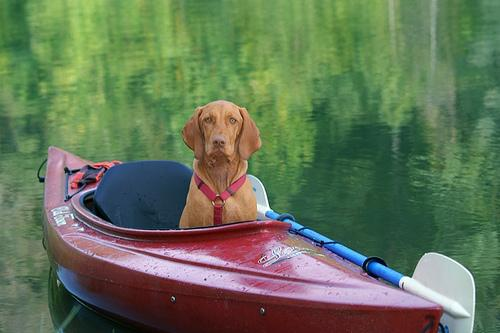

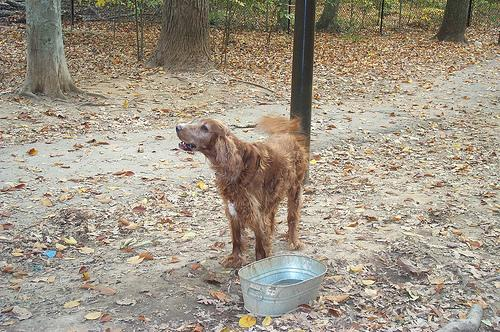

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


def get_breeds():
    response = requests.get(f"{BASE_URL}/breeds/list/all")
    if response.status_code == 200:
        breeds = response.json()['message']
        print("Список всех пород собак:")
        for index, breed in enumerate(breeds.keys(), start=1):
            print(f"{index}. {breed}")
        return breeds.keys()
    else:
        print("Ошибка при получении списка пород.")
        return []


def get_dog_images(breeds):
    for breed in breeds:
        if breed in all_breeds:
            response = requests.get(f"{BASE_URL}/breed/{breed}/images/random")
            if response.status_code == 200:
                image_url = response.json()['message']
                res = requests.get(image_url)
                img = Image.open(io.BytesIO(res.content))
                display(img)
            else:
                print(f"Ошибка при получении изображения для породы: {breed}")
        else:
            print(f"Порода '{breed}' не найдена.")

BASE_URL = "https://dog.ceo/api"

all_breeds = get_breeds()

user_input = input("Введите породы собак через запятую: ")
breeds_list = user_input.split(',')
entered_breeds = []
for breed in breeds_list:
  entered_breeds.append(breed.strip())
get_dog_images(entered_breeds)